### Car Price-Linear Regression Modeling Assignment

#### Goal Statement: Model the car price using the available independent variables and provide significant independent variables on which the car price depends. 

### Importing and Understanding Data

In [577]:
### Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

In [578]:
### Read the car price file
car_price = pd.read_csv('CarPrice_Assignment.csv')

In [579]:
### Look at some of the top records from dataset
car_price.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [580]:
### Look at some of the bottom records in dataset
car_price.tail()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


In [581]:
### Check shape, column names and total number of records
print(car_price.shape)
print(car_price.columns)
print(len(car_price))

(205, 26)
Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')
205


In [582]:
### Just look at information of data type and other info using dataframe info
car_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [583]:
### Look for any null values
car_price.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [584]:
### The above clearly indicates that there are no null values. Lets look for unique value sum across the key
### Check the car_id as a dataset key is unique or not
print(len(car_price['car_ID'].unique()))
### Check the values in car name column
print(car_price['CarName'].head(30))
### Looks like we can use the split to split the car manufacturer or make from the model
car_price['make']=car_price['CarName'].str.split(' ').str[0]
print(car_price['make'].unique())

205
0            alfa-romero giulia
1           alfa-romero stelvio
2      alfa-romero Quadrifoglio
3                   audi 100 ls
4                    audi 100ls
5                      audi fox
6                    audi 100ls
7                     audi 5000
8                     audi 4000
9           audi 5000s (diesel)
10                     bmw 320i
11                     bmw 320i
12                       bmw x1
13                       bmw x3
14                       bmw z4
15                       bmw x4
16                       bmw x5
17                       bmw x3
18             chevrolet impala
19        chevrolet monte carlo
20          chevrolet vega 2300
21                dodge rampage
22          dodge challenger se
23                   dodge d200
24            dodge monaco (sw)
25           dodge colt hardtop
26              dodge colt (sw)
27         dodge coronet custom
28            dodge dart custom
29    dodge coronet custom (sw)
Name: CarName, dtype: object
['alfa-

In [585]:
#### Ok it clearly indicates that the values are correctly splitted but the data cleaning is required
### The car make names like vw,vokswagen are all volkswagen, toyuta is toyota and Nissan and nissan are same
### Let's clean the car make name
### The actual make is alfa romeo and not romero but unless the names are duplicate any company name will work.
### Let's not clean to replace the name to alfa romeo and keep it as it is as no impact of make name
# car_price['make']=car_price['make'].replace('alfa-romero','alfa romeo') 
car_price['make']=car_price['make'].replace('maxda','mazda')
car_price['make']=car_price['make'].replace('porcshce','porsche')
car_price['make']=car_price['make'].replace('toyouta','toyota')
car_price['make']=car_price['make'].replace('vokswagen','volkswagen')
car_price['make']=car_price['make'].replace('vw','volkswagen')
car_price['make']=car_price['make'].str.lower()  ### this will solve the problem for two make names with nissan
print(car_price['make'].unique())
### now lets drop the car name as we already have make no need of keeping two as we any way do not require it
car_price = car_price.drop('CarName', axis=1)

['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'buick' 'mercury' 'mitsubishi' 'nissan' 'peugeot' 'plymouth'
 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen' 'volvo']


In [586]:
#### Lets also look at other categorical columns to ensure no data quality issues
print(car_price['fueltype'].unique())
print(car_price['aspiration'].unique())
print(car_price['doornumber'].unique())
print(car_price['carbody'].unique())
print(car_price['drivewheel'].unique())
print(car_price['enginelocation'].unique())
print(car_price['enginetype'].unique())
print(car_price['cylindernumber'].unique())
print(car_price['fuelsystem'].unique())

['gas' 'diesel']
['std' 'turbo']
['two' 'four']
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
['rwd' 'fwd' '4wd']
['front' 'rear']
['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']


### EDA - Exploratory Data Analysis - Understanding Data

In [587]:
### Lets bring all numeric values in one dataframe and look at values
car_price_num = car_price.select_dtypes(include = ['float64', 'int64'])
### Let's remove CAR ID as it is not useful in current context and is not required
car_price_num = car_price_num.drop('car_ID',axis=1)
car_price_num.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


Populating the interactive namespace from numpy and matplotlib


C:\Users\kaust\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


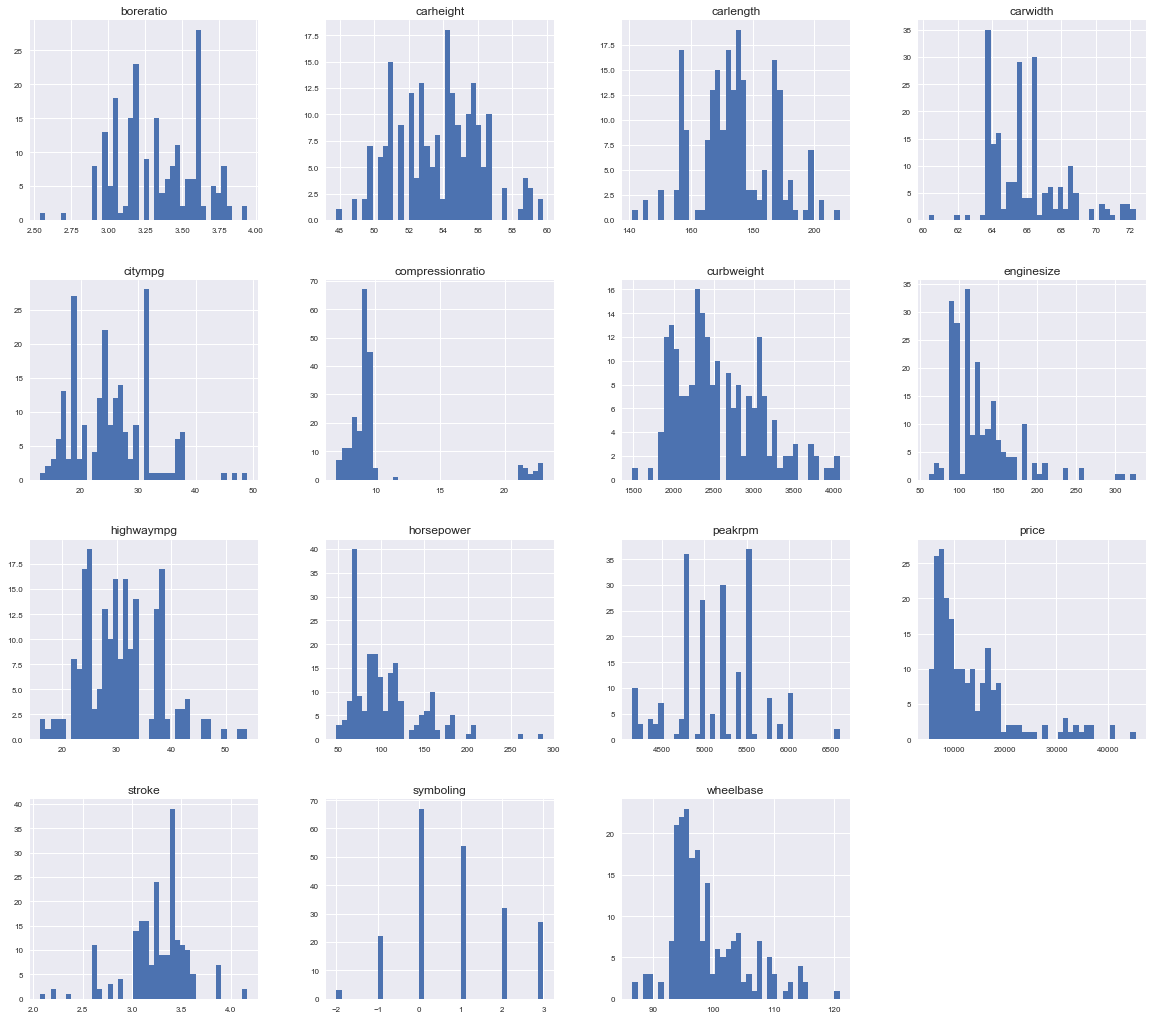

In [588]:
### Let's plot histogram for all
%pylab inline
car_price_num.hist(figsize=(20, 18), bins=40, xlabelsize=8, ylabelsize=8);

### Inference

#### 1.) Price - Car price min-4500,max-45400,median-10295,mean-13276, std deviation-7988. The difference of values between the 25th percentile and 75th percentile & standard deviation clearly suggests that the data is skewed. Also the plotted historgram shows that most of the cars are lower priced cars. There are only few greater than 20000. The histogram is rightly skewed.
#### 2.) Horsepower - Similar observations as price for horse power. The data may be skewed as indicated and is rightly skewed. Most of the cars are under 125-130 horsepower only few cars have higher horse power.
#### 3.) WheelBase - The data is not skewed except one or two high values. The std deviation is low not much siginificant difference between 25th and 75th percentile. The histogram also suggests that the peak or most cars are in wheel base range of 92.5 to 105.
#### 4.) EngineSize - Again the data is skewed for engine size as significant difference between 25th and 75th percentile and the std deviation is high. The histogram is rightly skewed and most cars are in range with engine size of 80 - 150.
#### 5.) Stroke - The stroke data is not much skewed
#### 6.) BoreRatio - The analysis and original data source link suggests it is bore not bore ration. The bore follows the stroke as the data is not much skewed.
#### 7.) CompressionRatio - The histogram clearly shows that the data is rightly skewed.
#### 8.) The height,width and length are exhibiting similar behaviours. The data not much skewed.
#### 9.) The CityMPG again not much skewed. Few high value records.

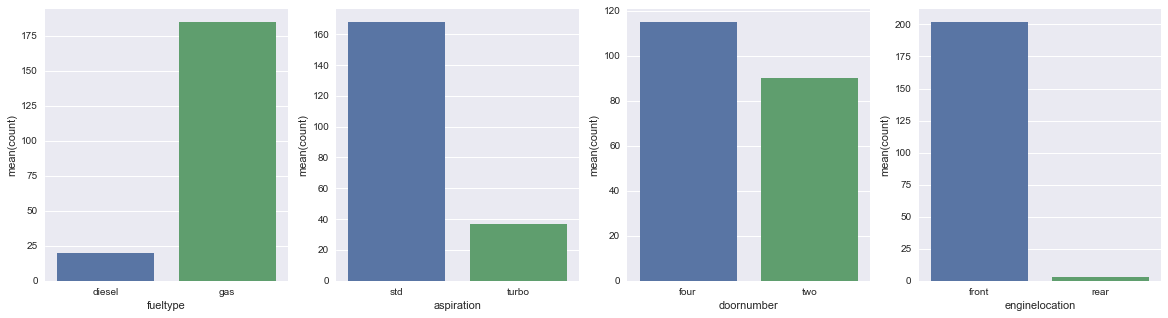

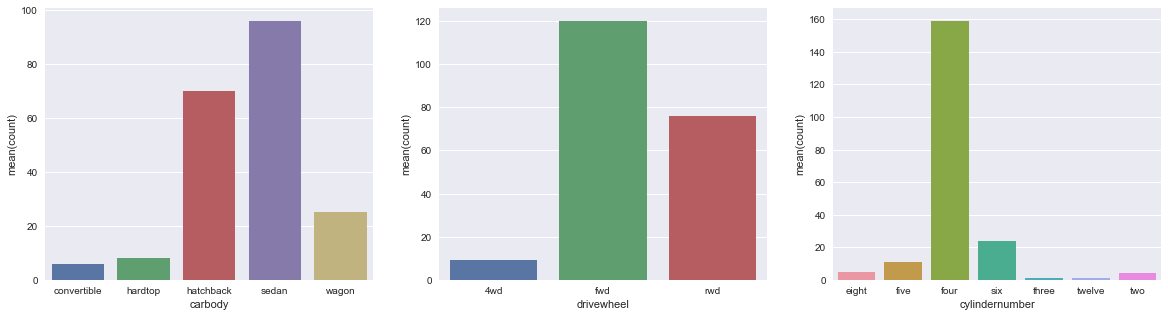

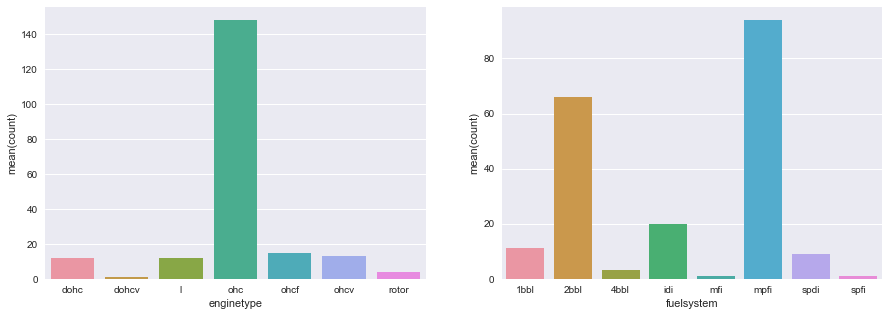

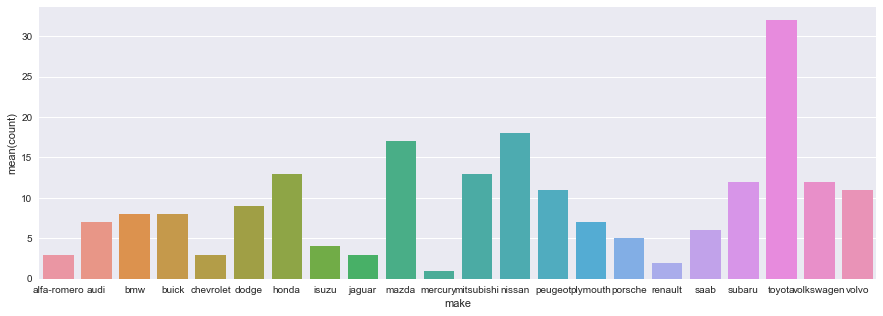

In [589]:
### Now let's look at some unordered categorical values in terms of counts
### Lets looks at some unordered categorical variables based on number of records.
x=car_price.set_index('fueltype').groupby(level=0)['car_ID'].agg(['count'])
x=x.reset_index()
y=car_price.set_index('aspiration').groupby(level=0)['car_ID'].agg(['count'])
y=y.reset_index()
z=car_price.set_index('doornumber').groupby(level=0)['car_ID'].agg(['count'])
z=z.reset_index()
l=car_price.set_index('enginelocation').groupby(level=0)['car_ID'].agg(['count'])
l=l.reset_index()
m=car_price.set_index('enginelocation').groupby(level=0)['car_ID'].agg(['count'])
m=l.reset_index()
fig, ax = plt.subplots(ncols=4,figsize=(20,5))
sns.barplot(x='fueltype', y='count', data=x,ax=ax[0])
sns.barplot(x='aspiration', y='count', data=y,ax=ax[1])
sns.barplot(x='doornumber', y='count', data=z,ax=ax[2])
sns.barplot(x='enginelocation', y='count', data=l,ax=ax[3])
plt.show()
x=car_price.set_index('carbody').groupby(level=0)['car_ID'].agg(['count'])
x=x.reset_index()
y=car_price.set_index('drivewheel').groupby(level=0)['car_ID'].agg(['count'])
y=y.reset_index()
z=car_price.set_index('cylindernumber').groupby(level=0)['car_ID'].agg(['count'])
z=z.reset_index()
fig, ax = plt.subplots(ncols=3,figsize=(20,5))
sns.barplot(x='carbody', y='count', data=x,ax=ax[0])
sns.barplot(x='drivewheel', y='count', data=y,ax=ax[1])
sns.barplot(x='cylindernumber', y='count', data=z,ax=ax[2])
plt.show()
x=car_price.set_index('enginetype').groupby(level=0)['car_ID'].agg(['count'])
x=x.reset_index()
y=car_price.set_index('fuelsystem').groupby(level=0)['car_ID'].agg(['count'])
y=y.reset_index()
fig, ax = plt.subplots(ncols=2,figsize=(15,5))
sns.barplot(x='enginetype', y='count', data=x,ax=ax[0])
sns.barplot(x='fuelsystem', y='count', data=y,ax=ax[1])
plt.show()
x=car_price.set_index('make').groupby(level=0)['car_ID'].agg(['count'])
x=x.reset_index()
fig, ax = plt.subplots(figsize=(15,5))
sns.barplot(x='make', y='count', data=x,ax=ax)
plt.show()

### Inference

#### 1.) The maximum cars are Gas cars as compare to Diesel Cars.
#### 2.) Most of the cars are with Standard Aspiration.
#### 3.) Good number of cars with both four doors and two doors. Maximum are with four doors.
#### 4.) Maximum cars with engine located in front. The rear engine cars are very rare.
#### 5.) Most of the cars are with body type SEDAN followed by HATCHBACK and WAGON.
#### 6.) Most of the cars are forward wheel drive followed by rear wheel drive. Very less 4 wheel drive cars.
#### 7.) Agsin most of the cars are with 4 cylinder followed by 6 and five. The rest cyclinder options are very low.
#### 8.) Most cars are with engine type OHC followed by OHCF and L.
#### 9.) Most cars are with Multi Point Fuel Injecting fuel system followed by 2 bbl.
#### 10.) Toyota Cars are sold the most followed by Nissan and Mazda.

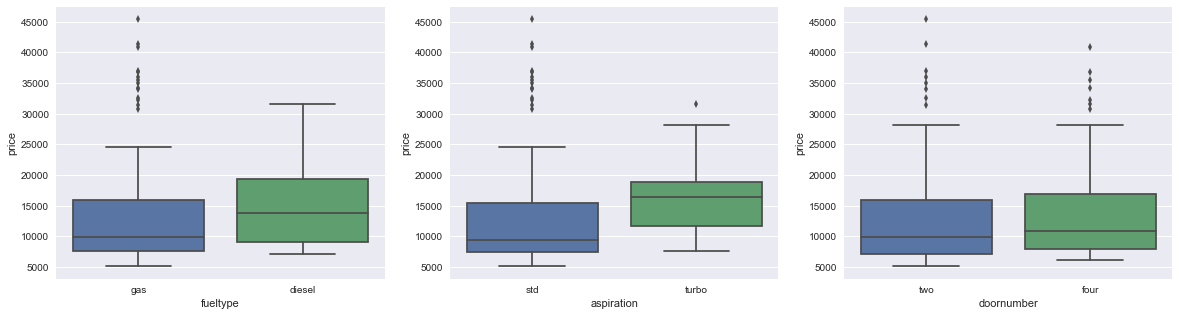

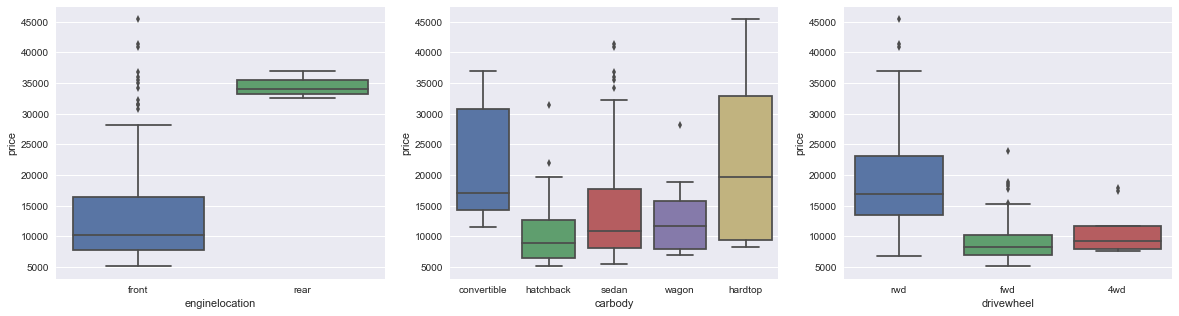

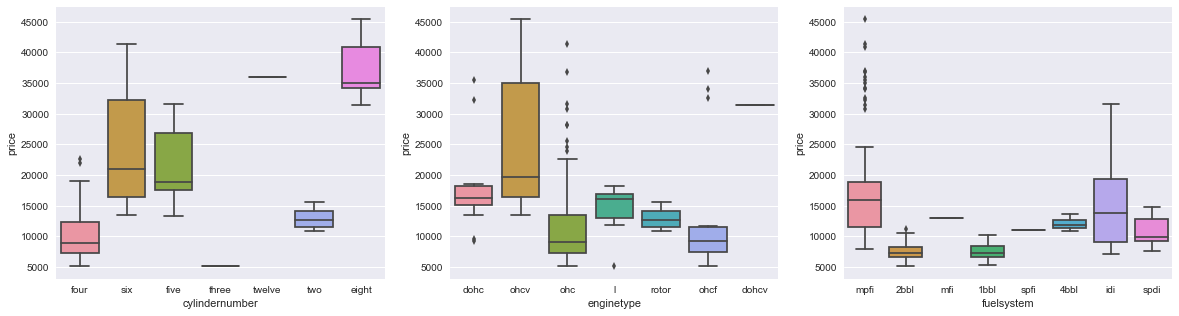

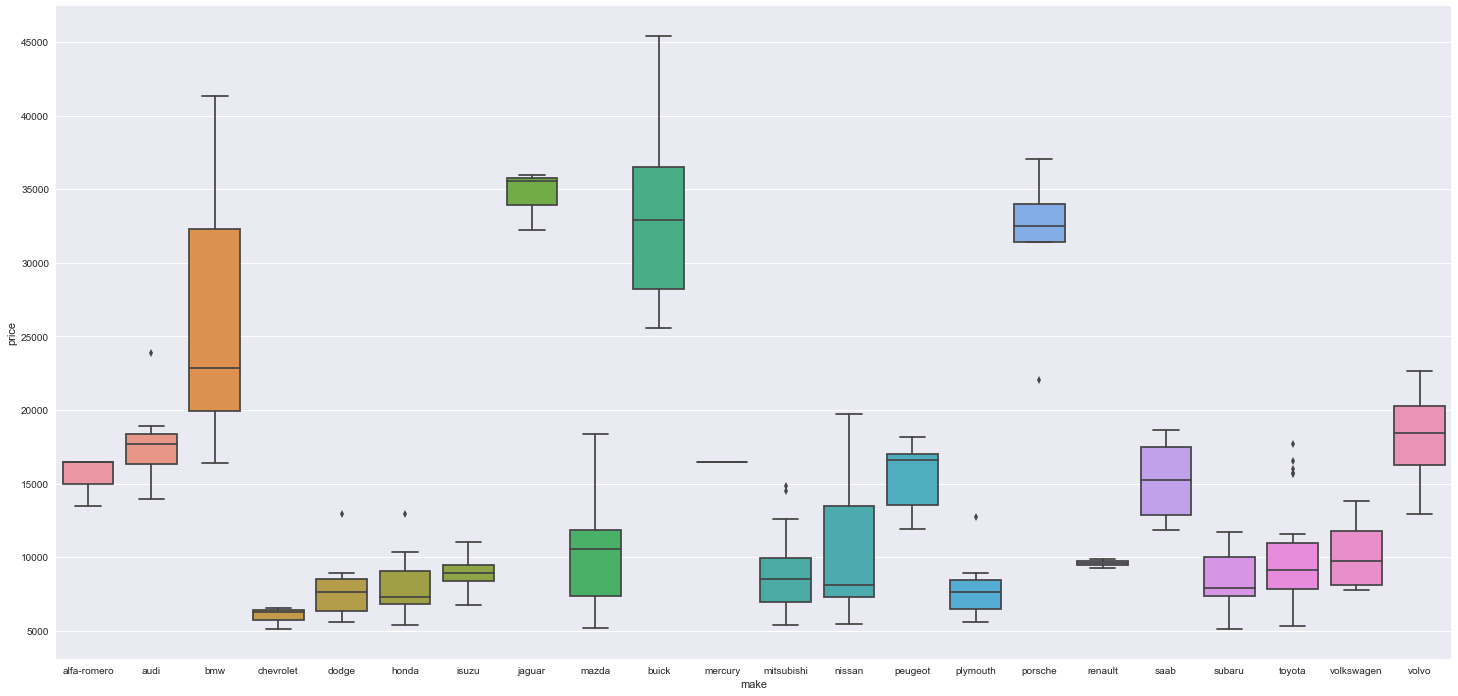

In [590]:
### Our main variable of interest is price as we have to build model for price prediction using other independent varible.
#### We should now solely concentrate on identifying how price is related to other variable
### Lets do some box plots by comparing price with some unordered categorical values
fig, ax = plt.subplots(ncols=3,figsize=(20,5))
sns.boxplot(x='fueltype', y='price', data=car_price,ax=ax[0])
sns.boxplot(x='aspiration', y='price', data=car_price,ax=ax[1])
sns.boxplot(x='doornumber', y='price', data=car_price,ax=ax[2])
plt.show()
fig, ax = plt.subplots(ncols=3,figsize=(20,5))
sns.boxplot(x='enginelocation', y='price', data=car_price,ax=ax[0])
sns.boxplot(x='carbody', y='price', data=car_price,ax=ax[1])
sns.boxplot(x='drivewheel', y='price', data=car_price,ax=ax[2])
plt.show()
fig, ax = plt.subplots(ncols=3,figsize=(20,5))
sns.boxplot(x='cylindernumber', y='price', data=car_price,ax=ax[0])
sns.boxplot(x='enginetype', y='price', data=car_price,ax=ax[1])
sns.boxplot(x='fuelsystem', y='price', data=car_price,ax=ax[2])
plt.show()
fig, ax = plt.subplots(figsize=(25,12))
sns.boxplot(x='make', y='price', data=car_price,ax=ax)
plt.show()

### Inference

#### 1.) The Diesel Cars starts higher in price but the Gas Cars have larger range and many cars costlier than diesel.
#### 2.) The turbo cars starts higher in price. The standard aspiration cars strarts at lower but has bigger range and lower mean than the turbo cars.
#### 3.) The two door and four door cars are almost similar in terms of mean and prices. Few two door cars are costlier than four.
#### 4.) The rear engine cars are costlier but has very small price range. The front engine cars have greater price range.
#### 5.) The eight cylinder engine is more costlier and OHCV engine type has highest range.
#### 6.) Most of the car makers have car prices under 20000 only few like BMW, JAGUAR, BUICK and PORSCHE are operating in higher price segments




### Multivariate Analysis

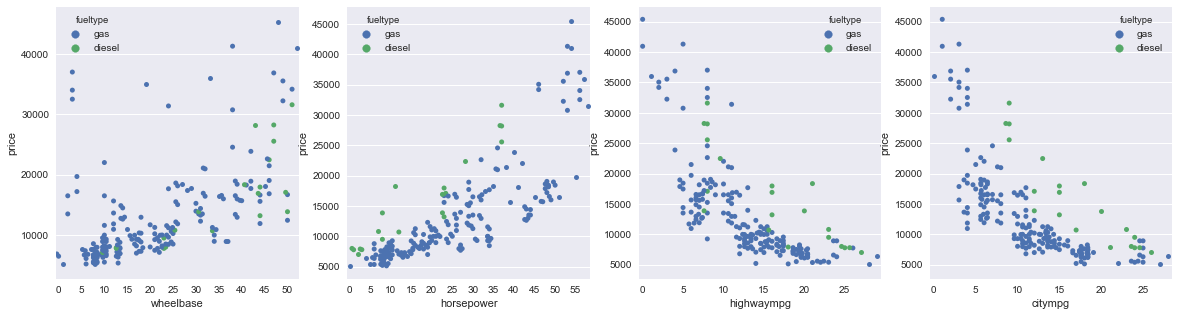

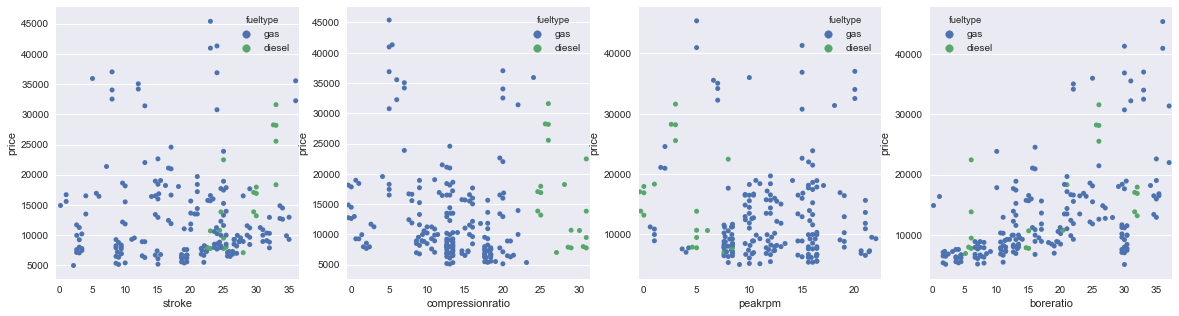

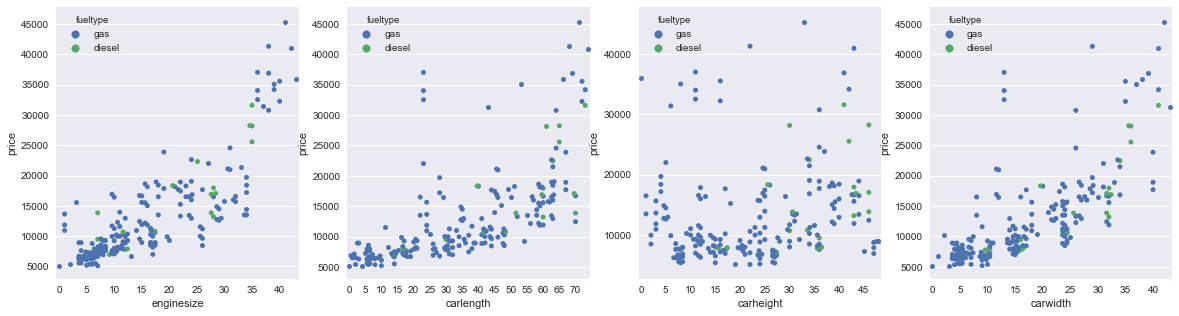

In [591]:
### The multivariate analysis is important to bring different relations between data.
### Let's plot multiple graphs over continous variables and at the same time reflect categories on top of it.
import matplotlib.ticker as ticker
fig, ax = plt.subplots(ncols=4,figsize=(20,5))
sns.swarmplot(x='wheelbase', y='price',hue='fueltype',data=car_price,ax=ax[0])
ax[0].xaxis.set_major_locator(ticker.MultipleLocator(5))
ax[0].xaxis.set_major_formatter(ticker.ScalarFormatter())
sns.swarmplot(x='horsepower', y='price',hue='fueltype',data=car_price,ax=ax[1])
ax[1].xaxis.set_major_locator(ticker.MultipleLocator(5))
ax[1].xaxis.set_major_formatter(ticker.ScalarFormatter())
sns.swarmplot(x='highwaympg', y='price',hue='fueltype',data=car_price,ax=ax[2])
ax[2].xaxis.set_major_locator(ticker.MultipleLocator(5))
ax[2].xaxis.set_major_formatter(ticker.ScalarFormatter())
sns.swarmplot(x='citympg', y='price',hue='fueltype',data=car_price,ax=ax[3])
ax[3].xaxis.set_major_locator(ticker.MultipleLocator(5))
ax[3].xaxis.set_major_formatter(ticker.ScalarFormatter())
plt.show()
fig, ax = plt.subplots(ncols=4,figsize=(20,5))
sns.swarmplot(x='stroke', y='price',hue='fueltype',data=car_price,ax=ax[0])
ax[0].xaxis.set_major_locator(ticker.MultipleLocator(5))
ax[0].xaxis.set_major_formatter(ticker.ScalarFormatter())
sns.swarmplot(x='compressionratio', y='price',hue='fueltype',data=car_price,ax=ax[1])
ax[1].xaxis.set_major_locator(ticker.MultipleLocator(5))
ax[1].xaxis.set_major_formatter(ticker.ScalarFormatter())
sns.swarmplot(x='peakrpm', y='price',hue='fueltype',data=car_price,ax=ax[2])
ax[2].xaxis.set_major_locator(ticker.MultipleLocator(5))
ax[2].xaxis.set_major_formatter(ticker.ScalarFormatter())
sns.swarmplot(x='boreratio', y='price',hue='fueltype',data=car_price,ax=ax[3])
ax[3].xaxis.set_major_locator(ticker.MultipleLocator(5))
ax[3].xaxis.set_major_formatter(ticker.ScalarFormatter())
plt.show()
fig, ax = plt.subplots(ncols=4,figsize=(20,5))
sns.swarmplot(x='enginesize', y='price',hue='fueltype',data=car_price,ax=ax[0])
ax[0].xaxis.set_major_locator(ticker.MultipleLocator(5))
ax[0].xaxis.set_major_formatter(ticker.ScalarFormatter())
sns.swarmplot(x='carlength', y='price',hue='fueltype',data=car_price,ax=ax[1])
ax[1].xaxis.set_major_locator(ticker.MultipleLocator(5))
ax[1].xaxis.set_major_formatter(ticker.ScalarFormatter())
sns.swarmplot(x='carheight', y='price',hue='fueltype',data=car_price,ax=ax[2])
ax[2].xaxis.set_major_locator(ticker.MultipleLocator(5))
ax[2].xaxis.set_major_formatter(ticker.ScalarFormatter())
sns.swarmplot(x='carwidth', y='price',hue='fueltype',data=car_price,ax=ax[3])
ax[3].xaxis.set_major_locator(ticker.MultipleLocator(5))
ax[3].xaxis.set_major_formatter(ticker.ScalarFormatter())
plt.show()

### Inference

#### 1.) The Gas based cars have higher wheelbase and higher price as compared to diesel cars
#### 2.) The Gas based cars have higher horsepower and higher price as compared to diesel cars
#### 3.) The Gas based cars have lower highway mpg and city mpg and higher prices as compared to diesel cars
#### 4.) The diesel based cars have higher compression ratio, stroke, low peak rpm
#### 5.) The Gas based cars has lower size of engine as compared to diesel and are lower priced.

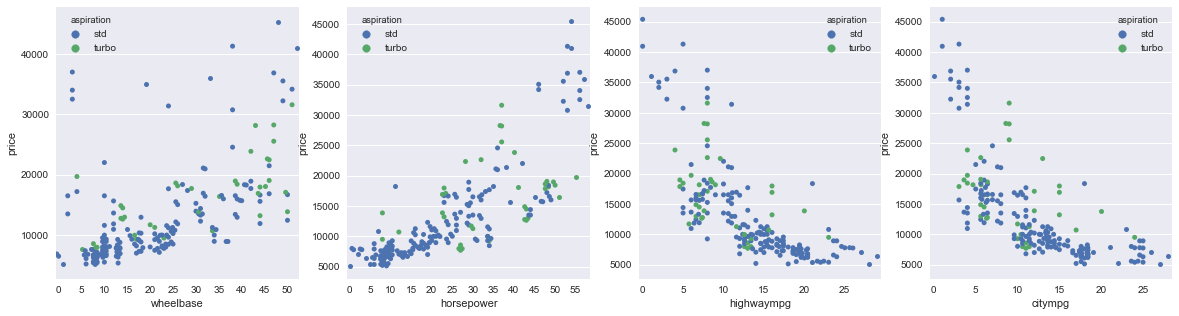

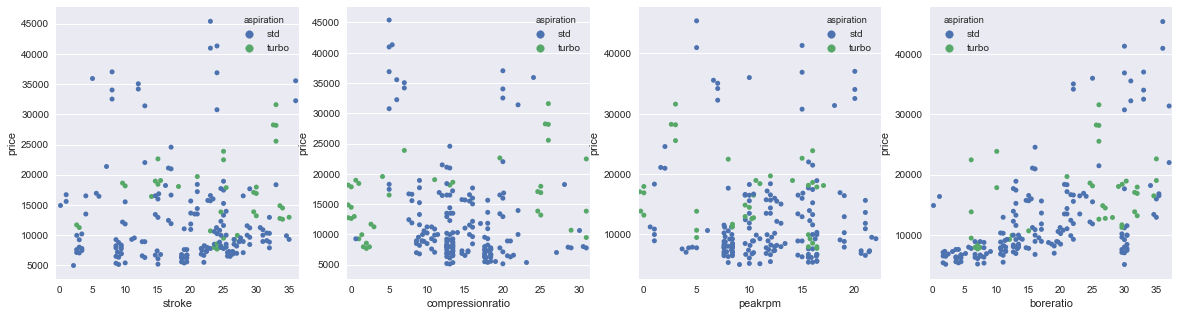

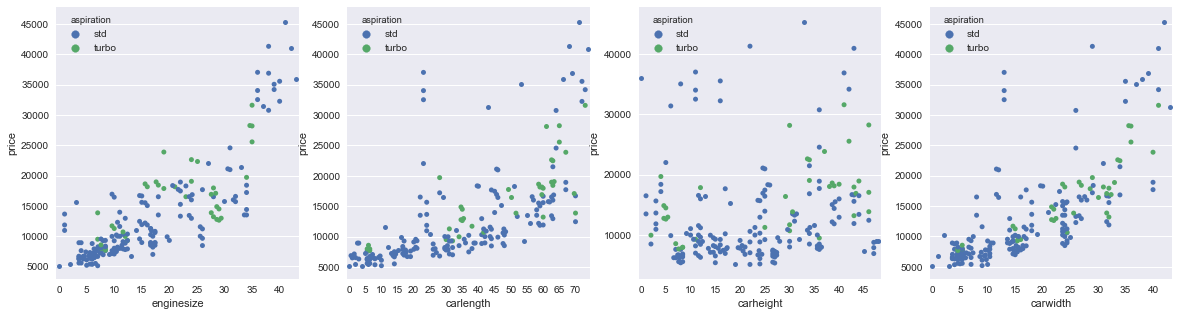

In [592]:
#### Let's plot price with other continous variable and also use the different categorical variable
fig, ax = plt.subplots(ncols=4,figsize=(20,5))
sns.swarmplot(x='wheelbase', y='price',hue='aspiration',data=car_price,ax=ax[0])
ax[0].xaxis.set_major_locator(ticker.MultipleLocator(5))
ax[0].xaxis.set_major_formatter(ticker.ScalarFormatter())
sns.swarmplot(x='horsepower', y='price',hue='aspiration',data=car_price,ax=ax[1])
ax[1].xaxis.set_major_locator(ticker.MultipleLocator(5))
ax[1].xaxis.set_major_formatter(ticker.ScalarFormatter())
sns.swarmplot(x='highwaympg', y='price',hue='aspiration',data=car_price,ax=ax[2])
ax[2].xaxis.set_major_locator(ticker.MultipleLocator(5))
ax[2].xaxis.set_major_formatter(ticker.ScalarFormatter())
sns.swarmplot(x='citympg', y='price',hue='aspiration',data=car_price,ax=ax[3])
ax[3].xaxis.set_major_locator(ticker.MultipleLocator(5))
ax[3].xaxis.set_major_formatter(ticker.ScalarFormatter())
plt.show()
fig, ax = plt.subplots(ncols=4,figsize=(20,5))
sns.swarmplot(x='stroke', y='price',hue='aspiration',data=car_price,ax=ax[0])
ax[0].xaxis.set_major_locator(ticker.MultipleLocator(5))
ax[0].xaxis.set_major_formatter(ticker.ScalarFormatter())
sns.swarmplot(x='compressionratio', y='price',hue='aspiration',data=car_price,ax=ax[1])
ax[1].xaxis.set_major_locator(ticker.MultipleLocator(5))
ax[1].xaxis.set_major_formatter(ticker.ScalarFormatter())
sns.swarmplot(x='peakrpm', y='price',hue='aspiration',data=car_price,ax=ax[2])
ax[2].xaxis.set_major_locator(ticker.MultipleLocator(5))
ax[2].xaxis.set_major_formatter(ticker.ScalarFormatter())
sns.swarmplot(x='boreratio', y='price',hue='aspiration',data=car_price,ax=ax[3])
ax[3].xaxis.set_major_locator(ticker.MultipleLocator(5))
ax[3].xaxis.set_major_formatter(ticker.ScalarFormatter())
plt.show()
fig, ax = plt.subplots(ncols=4,figsize=(20,5))
sns.swarmplot(x='enginesize', y='price',hue='aspiration',data=car_price,ax=ax[0])
ax[0].xaxis.set_major_locator(ticker.MultipleLocator(5))
ax[0].xaxis.set_major_formatter(ticker.ScalarFormatter())
sns.swarmplot(x='carlength', y='price',hue='aspiration',data=car_price,ax=ax[1])
ax[1].xaxis.set_major_locator(ticker.MultipleLocator(5))
ax[1].xaxis.set_major_formatter(ticker.ScalarFormatter())
sns.swarmplot(x='carheight', y='price',hue='aspiration',data=car_price,ax=ax[2])
ax[2].xaxis.set_major_locator(ticker.MultipleLocator(5))
ax[2].xaxis.set_major_formatter(ticker.ScalarFormatter())
sns.swarmplot(x='carwidth', y='price',hue='aspiration',data=car_price,ax=ax[3])
ax[3].xaxis.set_major_locator(ticker.MultipleLocator(5))
ax[3].xaxis.set_major_formatter(ticker.ScalarFormatter())
plt.show()

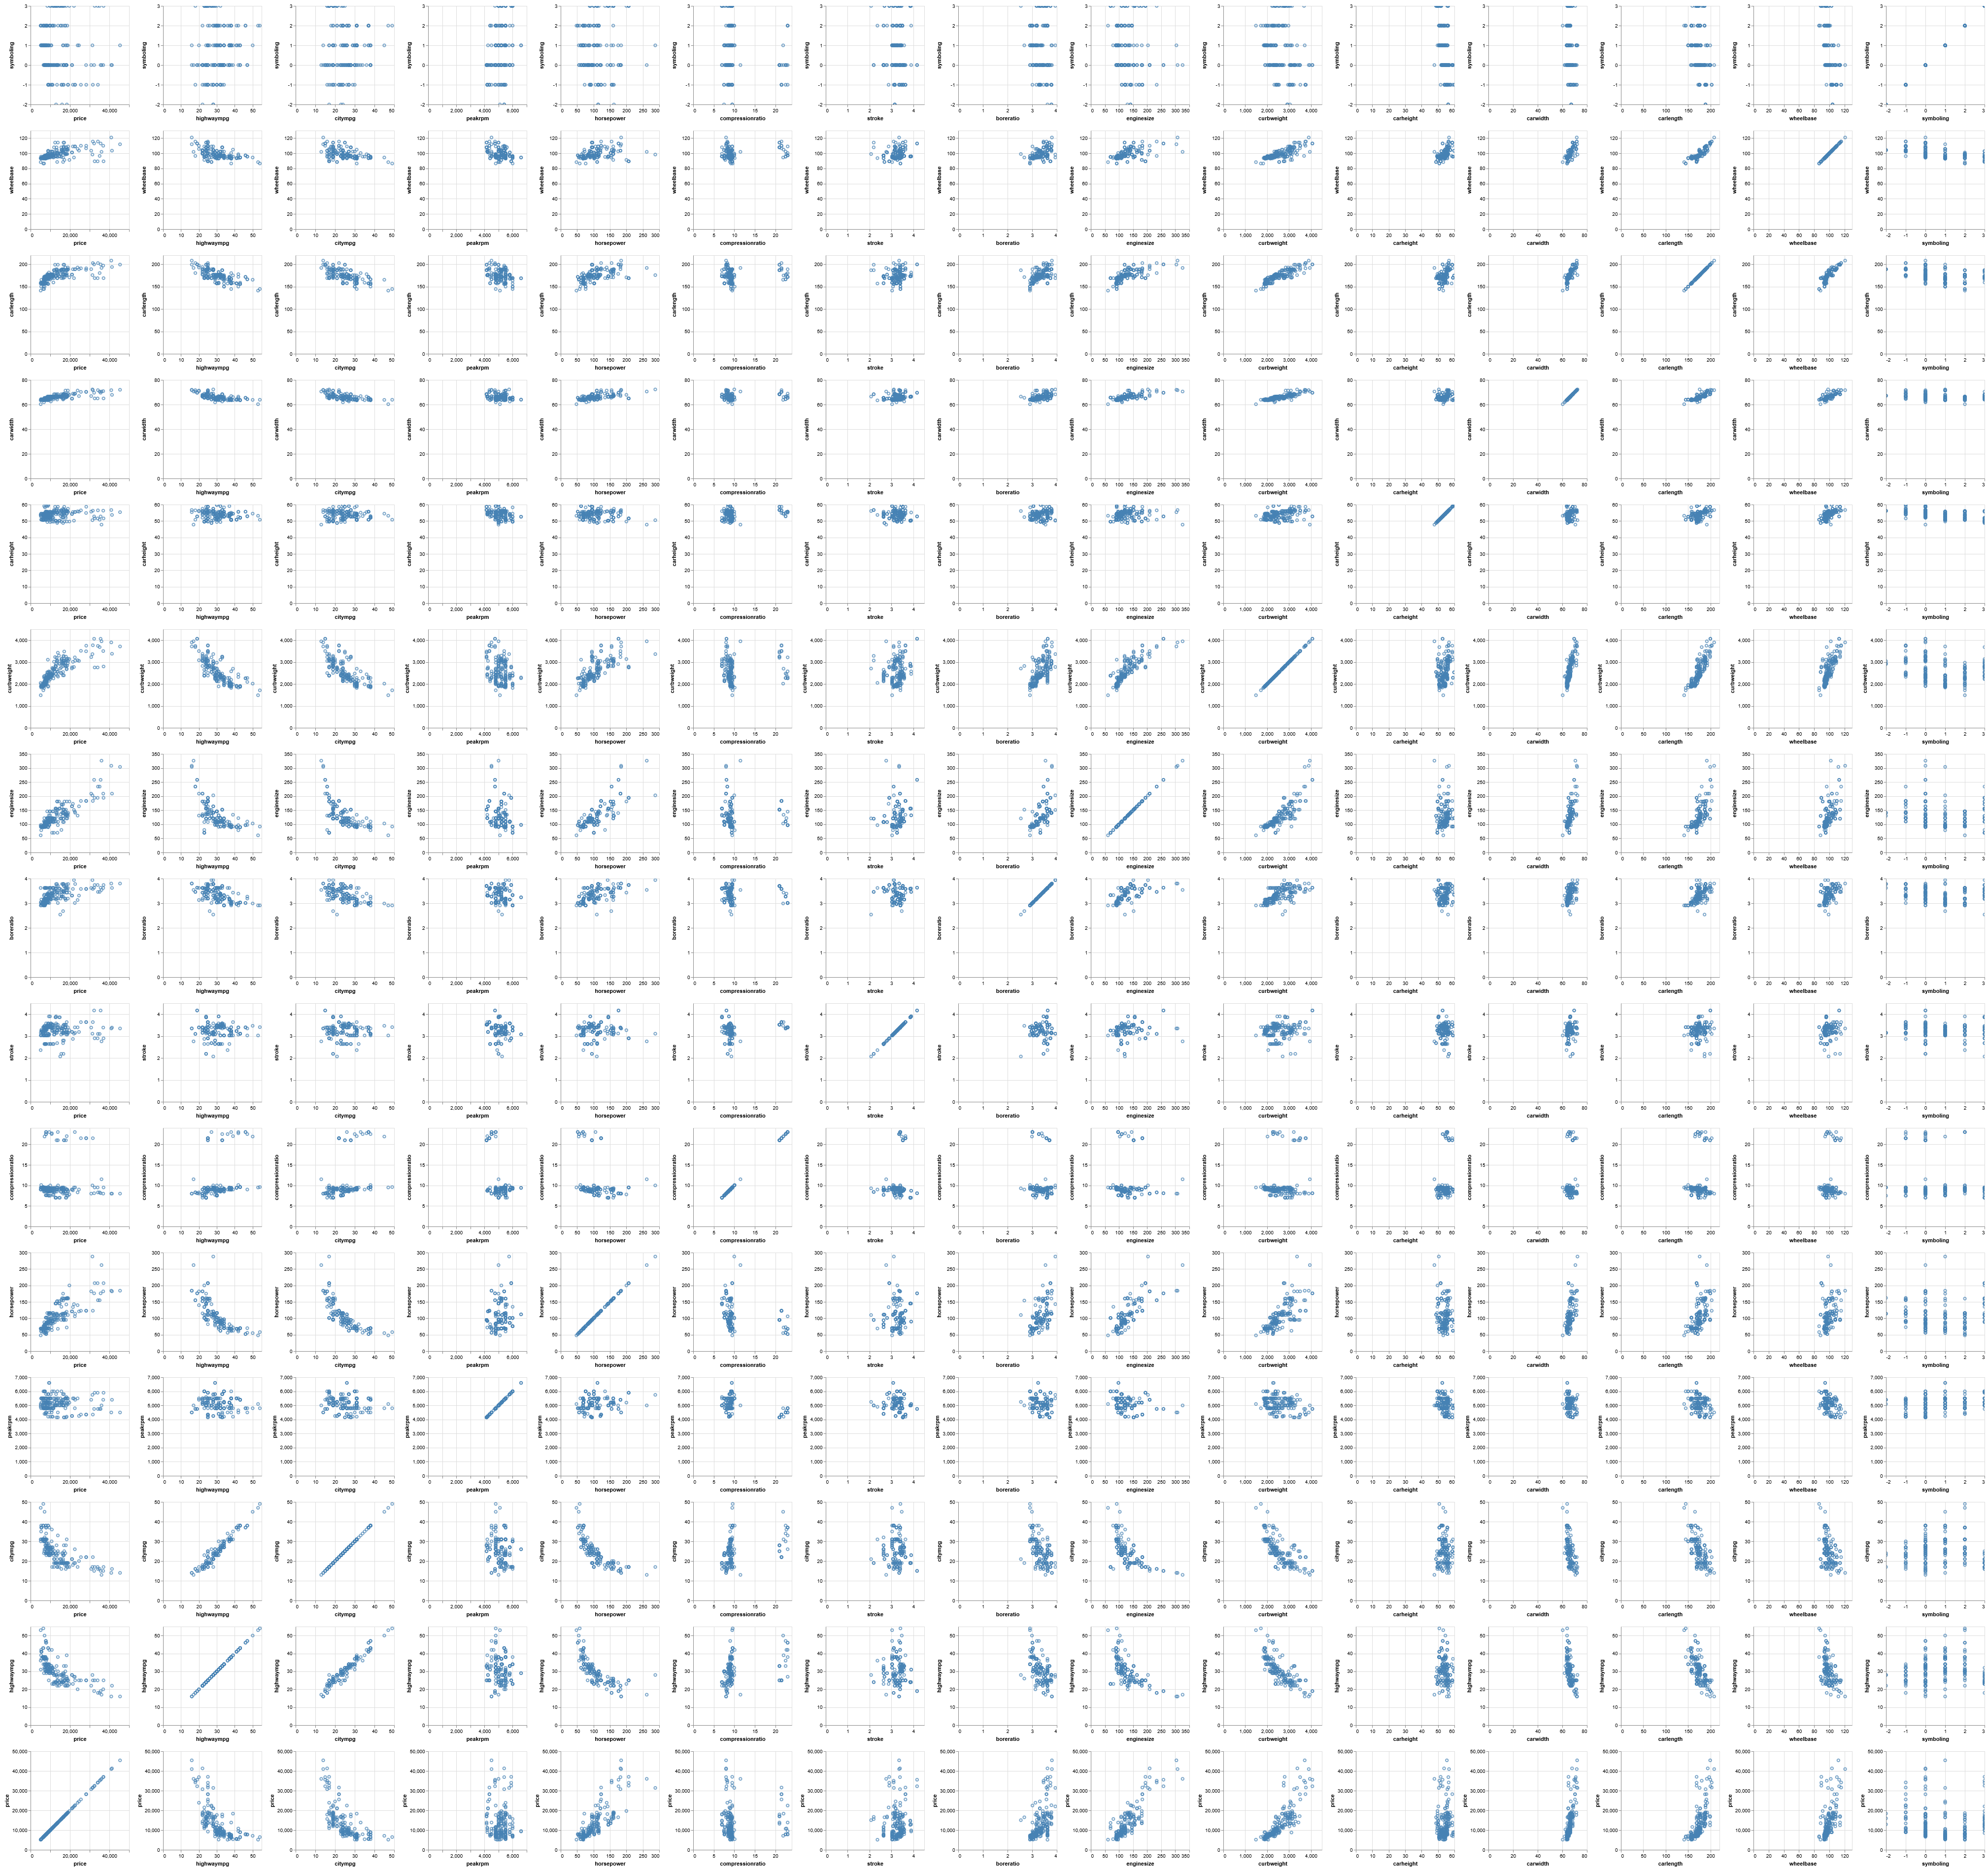

In [593]:
from pandas.plotting import scatter_matrix
import pdvega
pdvega.scatter_matrix(car_price_num,figsize(5,5))

Populating the interactive namespace from numpy and matplotlib


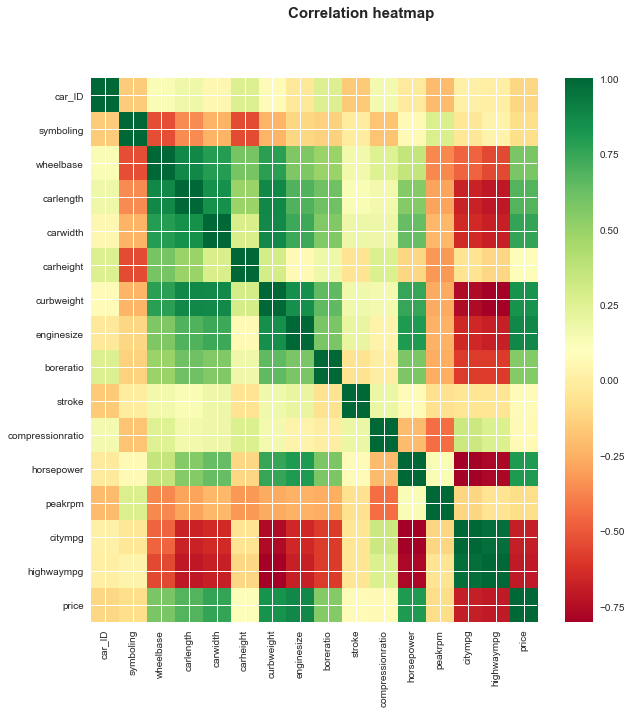

In [594]:
#### lets also plot some correlation matrixes and observe the trends
#Compute Correlation
corr = car_price.corr()
#Plot Correlation Matrix using Matplotlib
%pylab inline
plt.figure(figsize=(10, 10))
plt.imshow(corr, cmap='RdYlGn', interpolation='none', aspect='auto')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr)), corr.columns);
plt.suptitle('Correlation heatmap', fontsize=15, fontweight='bold')
plt.show()

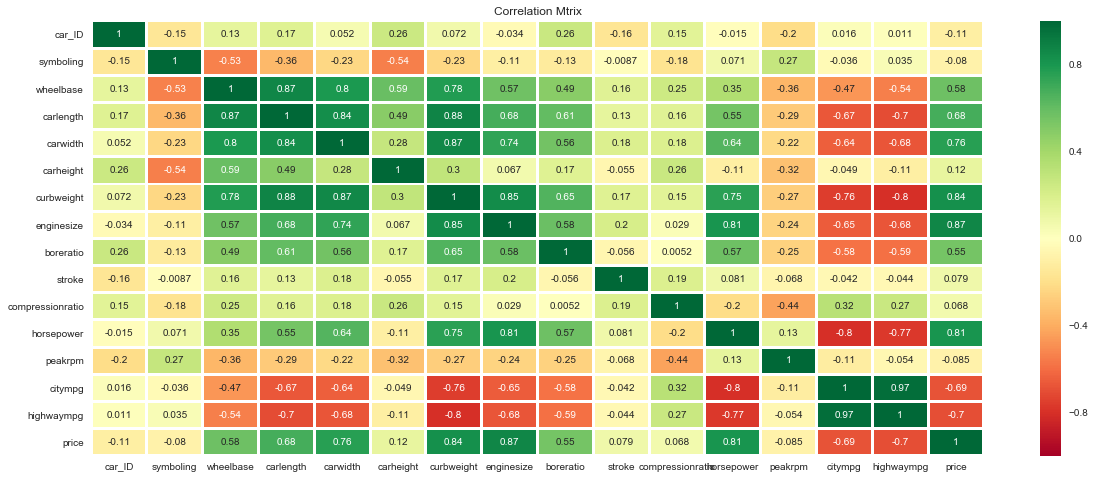

In [595]:
#### Lets also plot the correlation matrix and understand the relation
f, ax = plt.subplots(figsize=(20,8))
sns.heatmap(corr,linewidths=2.0, ax=ax , annot=True, cmap='RdYlGn')
ax.set_title('Correlation Mtrix')

### Inference 

#### All the above plots and specifically correlation gives us strong base to continue with Modelling the prices. Some of the inferences which we can draw using the scatter matrix, correlation is below. 

#### 1.) Car price is highly correlated to horespower, engine size, curbweight and carwidth.
#### 2.) Car price has strong negative correlation with highway and city mpg.
#### 3.) The scatter matrix also confirms the understanding that the price increases with horespower and engine size and decreases with highway mpg and city mpg.


### Model Building

In [596]:
### Let's convert some of the categorical data. We can map 0 and 1 for indicating two different values.
### Also let's replace text numbers with actual numbers like door number and cylinder number
car_price['fueltype']=car_price['fueltype'].map({'gas':0,'diesel':1})
car_price['aspiration']=car_price['aspiration'].map({'std':0,'turbo':1})
car_price['doornumber']=car_price['doornumber'].map({'two':2,'four':4})
car_price['enginelocation']=car_price['enginelocation'].map({'front':0,'rear':1})
car_price['cylindernumber']=car_price['cylindernumber'].map({'two':2,'three':3,'four':4,'five':5,'six':6,'eight':8,'twelve':12})
car_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
fueltype            205 non-null int64
aspiration          205 non-null int64
doornumber          205 non-null int64
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null int64
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null int64
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg            

In [597]:
### Let's create dummy variables for all categrorical variables with multiple values.
### We have to also convert make as we will be using it for analysis
carbody = pd.get_dummies(car_price['carbody'],drop_first=True)
drivewheel = pd.get_dummies(car_price['drivewheel'],drop_first=True)
enginetype = pd.get_dummies(car_price['enginetype'],drop_first=True)
fuelsystem = pd.get_dummies(car_price['fuelsystem'],drop_first=True)
make = pd.get_dummies(car_price['make'],drop_first=True)
print(carbody.head())
print(drivewheel.head())
print(enginetype.head())
print(fuelsystem.head())
print(make.head())
# ### Lets create a copy of the orginal dataframe to preserve values and use a new dataset for analysis
car_price_model = car_price.copy()
car_price_model = pd.concat([car_price_model,carbody,drivewheel,enginetype,fuelsystem,make],axis=1)
drop_columns = ['car_ID','carbody','drivewheel','enginetype','fuelsystem','make']
car_price_model = car_price_model.drop(drop_columns,axis=1)
print(car_price_model.columns)

   hardtop  hatchback  sedan  wagon
0        0          0      0      0
1        0          0      0      0
2        0          1      0      0
3        0          0      1      0
4        0          0      1      0
   fwd  rwd
0    0    1
1    0    1
2    0    1
3    1    0
4    0    0
   dohcv  l  ohc  ohcf  ohcv  rotor
0      0  0    0     0     0      0
1      0  0    0     0     0      0
2      0  0    0     0     1      0
3      0  0    1     0     0      0
4      0  0    1     0     0      0
   2bbl  4bbl  idi  mfi  mpfi  spdi  spfi
0     0     0    0    0     1     0     0
1     0     0    0    0     1     0     0
2     0     0    0    0     1     0     0
3     0     0    0    0     1     0     0
4     0     0    0    0     1     0     0
   audi  bmw  buick  chevrolet  dodge  honda  isuzu  jaguar  mazda  mercury  \
0     0    0      0          0      0      0      0       0      0        0   
1     0    0      0          0      0      0      0       0      0        0   
2     0

### Creating new features

#### The overall domain knowledge on what we see day to day in car industry the best variables which can be created are cubic capacity and bore/stoke ratio as the current bore ratio is just bore and not the actual bore-stroke ratio

#### Cubic Capacity of the Car = 0.7854 X Bore X Bore X Stroke X  number of cylinders
#### Stroke/Bore ratio = Stroke / Bore

In [598]:
### Cubic Capacity in inches
car_price_model['cubic_capacity'] =  0.7854 * car_price_model['boreratio'] * car_price_model['boreratio'] * car_price_model['stroke'] * car_price_model['cylindernumber']
### stroke/bore ratio
car_price_model['stroke-bore_ratio'] = car_price_model['stroke'] / car_price_model['boreratio']

In [599]:
### Rescaling is needed as the price is very high and it is best to normalize and bring values in similar scales
### There are various theories on which one to use min-max scaling or standardisation
### Let's for this example stick to min-max scaling and continue
#defining a normalisation function 
def normalize (x): 
    return ( (x-np.mean(x))/ (max(x) - min(x)))
                                            
                                              
# applying normalize ( ) to all columns 
car_price_model = car_price_model.apply(normalize) 

In [600]:
### Let's create test and training set data even though the data set size is small. We could have tried bootstrapping as well


# Putting feature variable to X
X = car_price_model[['symboling', 'fueltype', 'aspiration', 'doornumber', 'enginelocation',
       'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'cylindernumber', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
        'hardtop', 'hatchback', 'sedan', 'wagon', 'fwd', 'rwd',
       'dohcv', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor', '2bbl', '4bbl', 'idi',
       'mfi', 'mpfi', 'spdi', 'spfi', 'audi', 'bmw', 'buick', 'chevrolet',
       'dodge', 'honda', 'isuzu', 'jaguar', 'mazda', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab', 'subaru',
       'toyota', 'volkswagen', 'volvo']]

# Putting response variable to y
y = car_price_model['price']

In [601]:
#random_state is the seed used by the random number generator, it can be any integer.
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 ,test_size = 0.3, random_state=100)

In [602]:
## Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
# Running RFE with the output number of the variable equal to 10
lr = LinearRegression()
rfe = RFE(lr, 10)             # running RFE
rfe = rfe.fit(X_train, y_train)
col = X_train.columns[rfe.support_]
X_rfe = X_train[col]
X_rfe = sm.add_constant(X_rfe)
lm = sm.OLS(y_train,X_rfe).fit()

In [603]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     143.9
Date:                Sun, 18 Mar 2018   Prob (F-statistic):           6.56e-66
Time:                        23:56:02   Log-Likelihood:                 209.34
No. Observations:                 143   AIC:                            -396.7
Df Residuals:                     132   BIC:                            -364.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0031      0.005      0.

In [604]:
# UDF for calculating vif value
def vif_cal(input_data, dependent_col):
    vif_df = pd.DataFrame( columns = ['Var', 'Vif'])
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(y,x).fit().rsquared  
        vif=round(1/(1-rsq),2)
        vif_df.loc[i] = [xvar_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)

In [605]:
# Calculating Vif value
vif_cal(input_data=car_price_model, dependent_col="price")

C:\Users\kaust\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


,Var,Vif
28,ohcf,inf
1,fueltype,inf
4,enginelocation,inf
33,idi,inf
55,subaru,inf
60,stroke-bore_ratio,772.040000
59,cubic_capacity,524.090000
13,stroke,498.870000
12,boreratio,337.890000
11,enginesize,228.420000


### Predictions with above model

In [606]:
X_test_rfe = X_test[col]

# Adding a constant variable 
X_test_rfe = sm.add_constant(X_test_rfe)

# Making predictions
y_pred = lm.predict(X_test_rfe)

In [607]:
# Now let's check how well our model is able to make predictions.

# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

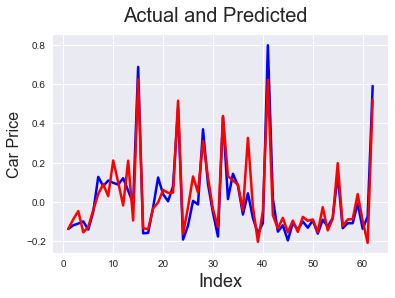

In [608]:
# Actual and Predicted
import matplotlib.pyplot as plt
c = [i for i in range(1,63,1)] # generating index 
fig = plt.figure() 
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-") #Plotting Actual
plt.plot(c,y_pred, color="red",  linewidth=2.5, linestyle="-") #Plotting predicted
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Car Price', fontsize=16)                       # Y-label

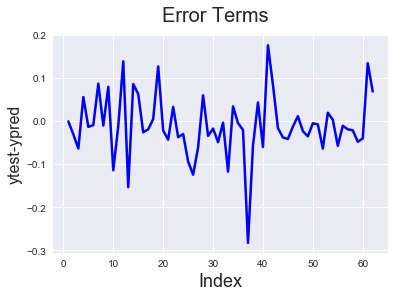

In [609]:
# Error terms
c = [i for i in range(1,63,1)]
fig = plt.figure()
plt.plot(c,y_test-y_pred, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('ytest-ypred', fontsize=16)                # Y-label

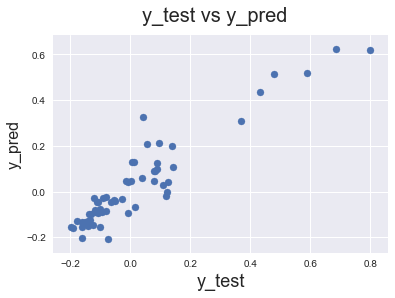

In [610]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

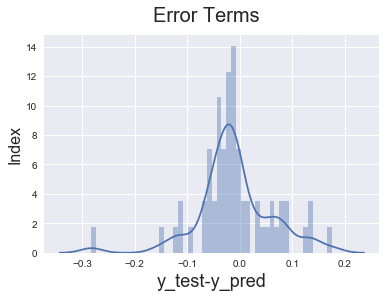

In [611]:
# Plotting the error terms to understand the distribution.
fig = plt.figure()
sns.distplot((y_test-y_pred),bins=50)
fig.suptitle('Error Terms', fontsize=20)                  # Plot heading 
plt.xlabel('y_test-y_pred', fontsize=18)                  # X-label
plt.ylabel('Index', fontsize=16)                          # Y-label

In [612]:
# Now let's check the Root Mean Square Error of our model.
import numpy as np
from sklearn import metrics
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE : 0.0730235094562
